# Are starting pitchers in the post-doping era (2013 and onwards) performing better than the past pitchers?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as scs
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0] / "src")
sys.path.append(module_path)
from stats_analysis import two_samples

In [2]:
df = pd.read_csv('../data/performances.csv')

In [3]:
pitchers = df.copy()

In [4]:
# Use of setroids were banned in 2005.
# Selecting pitchers who started at least 2 games to exclude emergency starting pitchers.

doping_season = (pitchers['GS'] >= 2) & (pitchers['yearID'] < 2005)
no_doping_season = (pitchers['GS'] >= 2) & (pitchers['yearID'] >= 2005)

In [5]:
pitchers[doping_season].shape

(3819, 35)

In [6]:
pitchers[no_doping_season].shape

(2113, 35)

(0.0, 300.0)

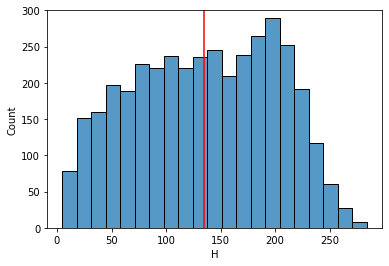

In [7]:
fig,ax = plt.subplots()
ax = sns.histplot(data = pitchers[doping_season],x='H')
ax.vlines(pitchers[doping_season]['H'].mean(),0,300,colors='red')
ax.set_ylim(0,300)

(0.0, 300.0)

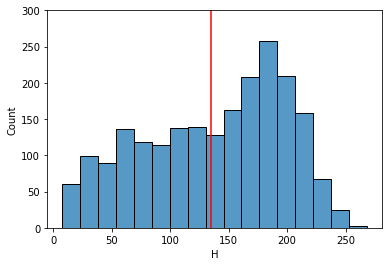

In [8]:
fig,ax = plt.subplots()
ax = sns.histplot(data = pitchers[no_doping_season],x='H')
ax.vlines(pitchers[doping_season]['H'].mean(),0,300,colors='red')
ax.set_ylim(0,300)

(0.0, 300.0)

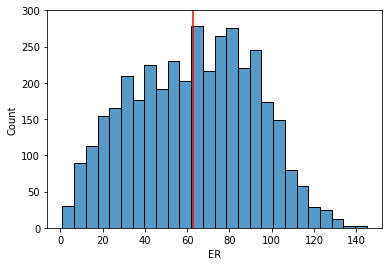

In [9]:
fig,ax = plt.subplots()
ax = sns.histplot(data = pitchers[doping_season],x='ER')
ax.vlines(pitchers[doping_season]['ER'].mean(),0,300,colors='red')
ax.set_ylim(0,300)

(0.0, 300.0)

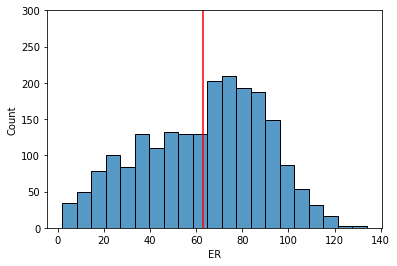

In [10]:
fig,ax = plt.subplots()
ax = sns.histplot(data = pitchers[no_doping_season],x='ER')
ax.vlines(pitchers[no_doping_season]['ER'].mean(),0,300,colors='red')
ax.set_ylim(0,300)

(0.0, 300.0)

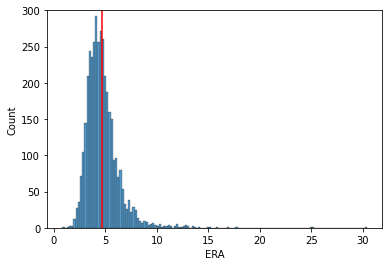

In [11]:
fig,ax = plt.subplots()
ax = sns.histplot(data = pitchers[doping_season],x='ERA')
ax.vlines(pitchers[doping_season]['ERA'].mean(),0,300, colors='red')
ax.set_ylim(0,300)

(0.0, 250.0)

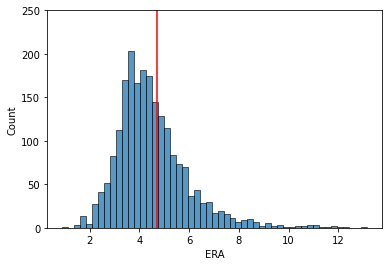

In [12]:
fig,ax=plt.subplots()
ax = sns.histplot(data = pitchers[no_doping_season],x='ERA')
ax.vlines(pitchers[doping_season]['ERA'].mean(),0,250, colors='red')
ax.set_ylim(0,250)

(0.0, 300.0)

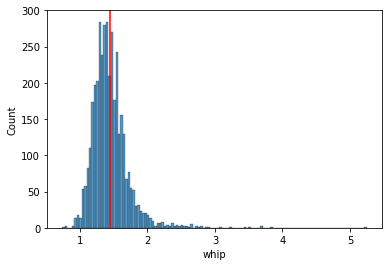

In [13]:
fig,ax=plt.subplots()
ax = sns.histplot(data = pitchers[doping_season],x='whip')
ax.vlines(pitchers[doping_season]['whip'].mean(),0,300, colors='red')
ax.set_ylim(0,300)

(0.0, 250.0)

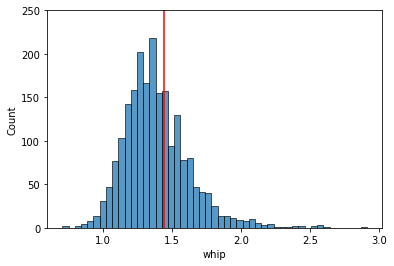

In [14]:
fig,ax=plt.subplots()
ax = sns.histplot(data = pitchers[no_doping_season],x='whip')
ax.vlines(pitchers[doping_season]['whip'].mean(),0,250, colors='red')
ax.set_ylim(0,250)

(0.0, 300.0)

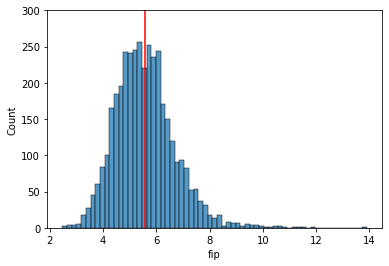

In [15]:
fig,ax=plt.subplots()
ax = sns.histplot(data = pitchers[doping_season],x='fip')
ax.vlines(pitchers[doping_season]['fip'].mean(),0,300, colors='red')
ax.set_ylim(0,300)

(0.0, 200.0)

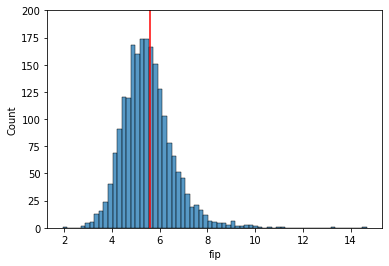

In [16]:
fig,ax=plt.subplots()
ax = sns.histplot(data = pitchers[no_doping_season],x='fip')
ax.vlines(pitchers[doping_season]['fip'].mean(),0,200, colors='red')
ax.set_ylim(0,200)

## Null hypothesis: There is no difference in earned runs between doping and post-doping era starting pitchers
## Alternate hypothesis: There is a difference in earned runs between doping and post-doping era starting pitchers

two sample t-test

In [17]:
ts = two_samples(pitchers)

In [18]:
ts.studentTtest(doping_season,no_doping_season,'whip')
ts.pval

2.0522033497860044e-15

In [19]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'whip')
ts.pval

3.293900069007132e-17

In [20]:
ts.studentTtest(doping_season,no_doping_season,'ERA')
ts.pval

4.8295157482447324e-06

In [21]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'ERA')
ts.pval

1.0277218098488601e-05

In [22]:
ts.studentTtest(doping_season,no_doping_season,'GIDP')
ts.pval

0.0006502660157156351

In [23]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'GIDP')
ts.pval

0.00025698880655244586

In [24]:
ts.studentTtest(doping_season,no_doping_season,'H')
ts.pval

0.15363949197016424

In [25]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'H')
ts.pval

0.14462180036886968

In [26]:
ts.studentTtest(doping_season,no_doping_season,'fip')
ts.pval

0.027120987832572708

In [27]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'fip')
ts.pval

0.017031676527751685

In [28]:
ts.studentTtest(doping_season,no_doping_season,'ER')
ts.pval

0.7896778988213315

In [29]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'ER')
ts.pval

0.5385325085305006

In [30]:
ts.studentTtest(doping_season,no_doping_season,'HR')
ts.pval

3.0992129743899085e-06

In [31]:
pval = ts.mannWhitneyUtest(doping_season,no_doping_season,'HR')
ts.pval

6.85109349946577e-08

In [32]:
ts.studentTtest(doping_season,no_doping_season,'BB')
ts.pval

1.8355610689145757e-07

In [33]:
ts.mannWhitneyUtest(doping_season,no_doping_season,'BB')
ts.pval

0.00010498891063495937

## left handed pitchers vs right handed pitchers

In [34]:
# Starting pitchers who at least pitched 2 games in a season
l_hand = (pitchers.throws == 'L') 
r_hand = (pitchers.throws == 'R')

In [35]:
print(pitchers[l_hand].shape)
print(pitchers[r_hand].shape)

(3481, 35)
(8468, 35)


In [36]:
ts.studentTtest(l_hand,r_hand,'ER')
ts.pval

0.0005673109153250381

In [37]:
ts.mannWhitneyUtest(l_hand,r_hand,'ER')
ts.pval

1.5949116969535456e-05

In [38]:
ts.studentTtest(l_hand,r_hand,'fip')
ts.pval

0.41381945385604335

In [39]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'fip')
ts.pval

0.41008937519204525

In [40]:
ts.studentTtest(l_hand,r_hand,'whip')
ts.pval

0.0005190372906687548

In [41]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'whip')
ts.pval

3.1619252041915024e-07

In [42]:
ts.studentTtest(l_hand,r_hand,'ERA')
ts.pval

0.6504633371336971

In [43]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'ERA')
ts.pval

0.5353584331989536

In [44]:
ts.studentTtest(l_hand,r_hand,'H')
ts.pval

0.004103211788878792

In [45]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'H')
ts.pval

5.528793287954471e-06

In [46]:
ts.studentTtest(l_hand,r_hand,'BB')
ts.pval

0.4391338031360684

In [47]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'BB')
ts.pval

0.17387016344178208

In [48]:
ts.studentTtest(l_hand,r_hand,'GIDP')
ts.pval

0.09048181114495356

In [49]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'GIDP')
ts.pval

0.8188200833597544

In [50]:
ts.studentTtest(l_hand,r_hand,'HR')
ts.pval

0.00039927327066423794

In [51]:
pval = ts.mannWhitneyUtest(l_hand,r_hand,'HR')
ts.pval

2.498987791287902e-06

In [52]:
ts.studentTtest(l_hand,r_hand,'L')
ts.pval

8.040490782711621e-07

# Earned Runs left vs right pitchers

## Null hypothesis: There is no difference between left and right pitchers in terms of earned runs.
## Alternate hypothesis: There is a difference between right and left-handed pitchers in terms of earned runs.